In [1]:
import pandas as pd
from functools import partial

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("../dataset/data_train.csv")
df.head()

,question,answer,image_id
0,what is the object on the shelves,cup,image100
1,how man chairs are there,6,image888
2,what is hanged to the right side of the bed,curtain,image1174
3,how many picture are on the wall,2,image942
4,what is the object on the floor behind the rack,room_divider,image1220


In [3]:
df.describe()

,question,answer,image_id
count,9974,9974,9974
unique,4961,1260,1442
top,what is on the table,2,image8
freq,200,442,25


In [4]:
# lets find average question corresponding to each image
df.groupby("image_id").count()["question"].mean()

6.916782246879334

- Approximately 7 Question is present corresponding to each image.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  9974 non-null   object
 1   answer    9974 non-null   object
 2   image_id  9974 non-null   object
dtypes: object(3)
memory usage: 233.9+ KB


<AxesSubplot:>

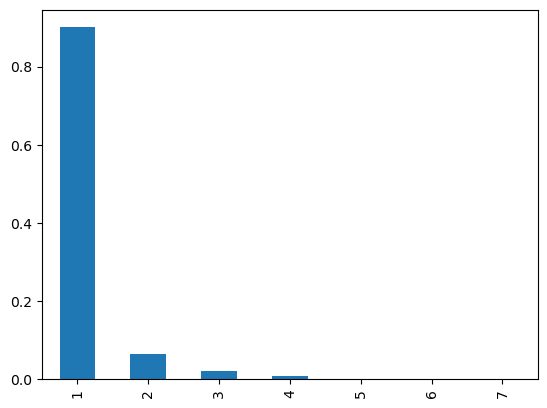

In [6]:
df["answer"].apply(lambda x: len(x.split(","))).value_counts(normalize=True).plot(kind="bar")

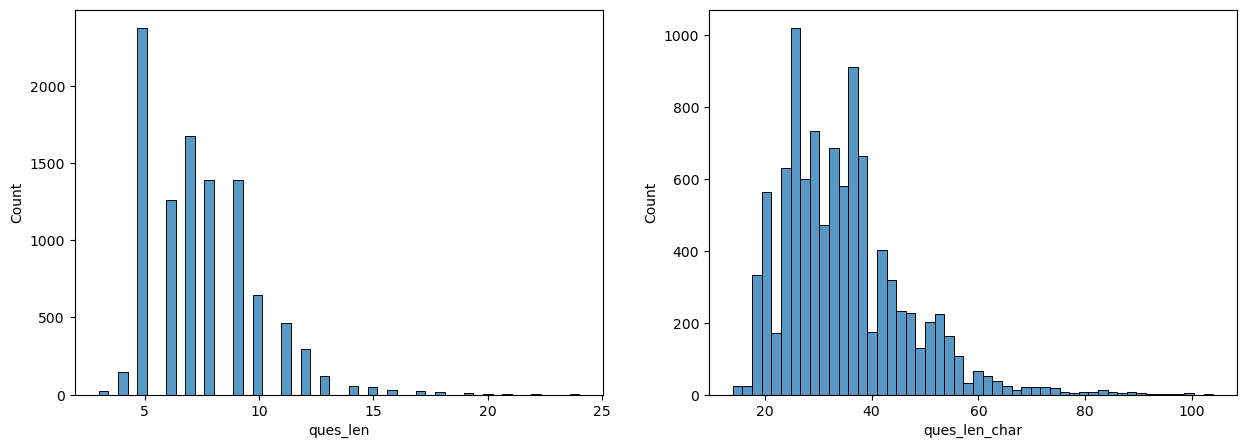

In [7]:
def ques_len(x):
    return len(x.split())

def ques_len_char(x):
    return len(x)

df["ques_len"] = df["question"].apply(ques_len)
df["ques_len_char"] = df["question"].apply(ques_len_char)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["ques_len"], ax=ax[0], bins=50)
sns.histplot(df["ques_len_char"], ax=ax[1], bins=50)
plt.show()

- Questions generally have 5-7 words.
- Mostly with length of about 22 to 42 characters.

In [8]:
df.ques_len.describe()

count    9974.000000
mean        7.543212
std         2.419648
min         3.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        24.000000
Name: ques_len, dtype: float64

In [9]:
df.ques_len_char.describe()

count    9974.000000
mean       34.591438
std        11.539921
min        14.000000
25%        26.000000
50%        33.000000
75%        40.000000
max       104.000000
Name: ques_len_char, dtype: float64

In [10]:
def first_k_ques_words(s, k=4):
    return " ".join(s.split()[:k])

df["first_4_ques_words"] = df['question'].apply(lambda x: first_k_ques_words(x, 4))
df["first_1_ques_words"] = df['question'].apply(lambda x: first_k_ques_words(x, 1))
df["first_2_ques_words"] = df['question'].apply(lambda x: first_k_ques_words(x, 2))

df.head()

,question,answer,image_id,ques_len,ques_len_char,first_4_ques_words,first_1_ques_words,first_2_ques_words
0,what is the object on the shelves,cup,image100,7,33,what is the object,what,what is
1,how man chairs are there,6,image888,5,24,how man chairs are,how,how man
2,what is hanged to the right side of the bed,curtain,image1174,10,43,what is hanged to,what,what is
3,how many picture are on the wall,2,image942,7,32,how many picture are,how,how many
4,what is the object on the floor behind the rack,room_divider,image1220,10,47,what is the object,what,what is


In [ ]:
# pie chart of only top 10 candidates
top_10 = df["first_4_ques_words"].value_counts().head(10).index
df_top_10 = df[df["first_4_ques_words"].isin(top_10)]
fig = px.pie(df_top_10, values='ques_len', names='first_4_ques_words', title='First 4 Words of Question')
fig.show()

# pie chart of only top 10 candidates
top_10 = df["first_1_ques_words"].value_counts().head(10).index
df_top_10 = df[df["first_1_ques_words"].isin(top_10)]
fig = px.pie(df_top_10, values='ques_len', names='first_1_ques_words', title='First Word of Question')
fig.show()

![pie_chart](../assets/newplot-4.png)
![pie_chart](../assets/newplot-5.png)

In [15]:
df.answer.value_counts()

2                                                   442
table                                               346
chair                                               293
3                                                   257
window                                              227
                                                   ... 
ornamental_plant, decorative_plate, books             1
guitar, keyboard, microphone_stand                    1
clock, poster_board, wire, telephone, fire_alarm      1
pink, black, green, purple                            1
papers, file                                          1
Name: answer, Length: 1260, dtype: int64

In [ ]:
def plot_freq_of_ans(df, col, title):
    fig = px.histogram(df, x=col, color="answer", title=title)
    fig.show()

plot_freq_of_ans(df, "first_2_ques_words", "Frequency of Answers for First 4 Words of Question")
plot_freq_of_ans(df, "first_1_ques_words", "Frequency of Answers for First Word of Question")

![HISTOGRAM](../assets/newplot.png)
![HISTOGRAM](../assets/newplot2.png)

*One thing to point out is that the dataset dont have question begining with why, i.e. it is strictly related to images and not based on common sense since why has strongest correlation with common sense.*

*It is heavily biased with questions begining with what.*

*This dataset does not have yes/no ansers type questions.*

In [ ]:
fig = px.histogram(df[df["answer"].apply(lambda x: any(char.isdigit() for char in x))], x="first_2_ques_words", color="answer", title="Frequency of Answers for First 4 Words of Question")
fig.show()

![HIST](../assets/newplot-3.png)

In [19]:
print("Number of questions with digits in answer :", 
df[df["answer"].apply(lambda x: any(char.isdigit() for char in x))]['answer'].value_counts().sum())

Number of questions with digits in answer : 1327


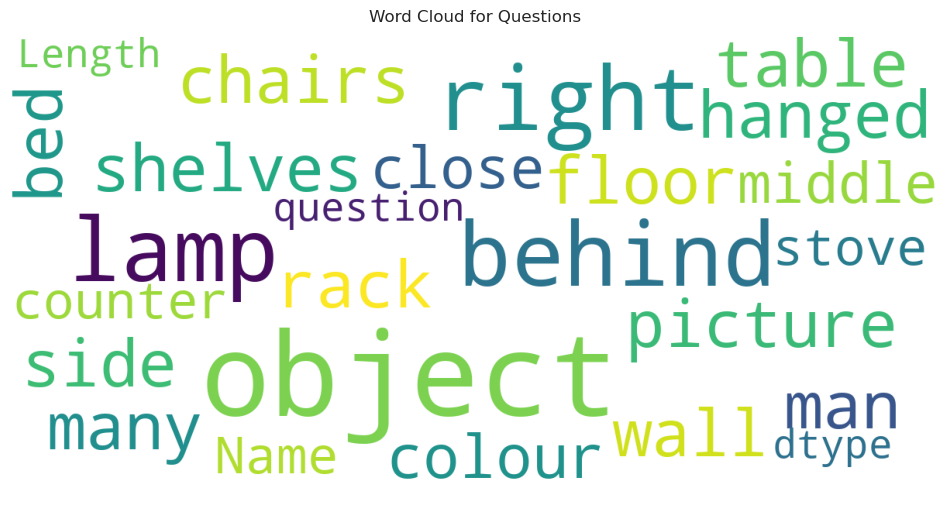

In [20]:
# word cloud for nouns, verbs, adjectives, adverbs
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def word_cloud(df, col, title):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=50, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(df[col]))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.title(title)
    plt.show()

word_cloud(df, "question", "Word Cloud for Questions")

In [23]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/justalearner/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /home/justalearner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

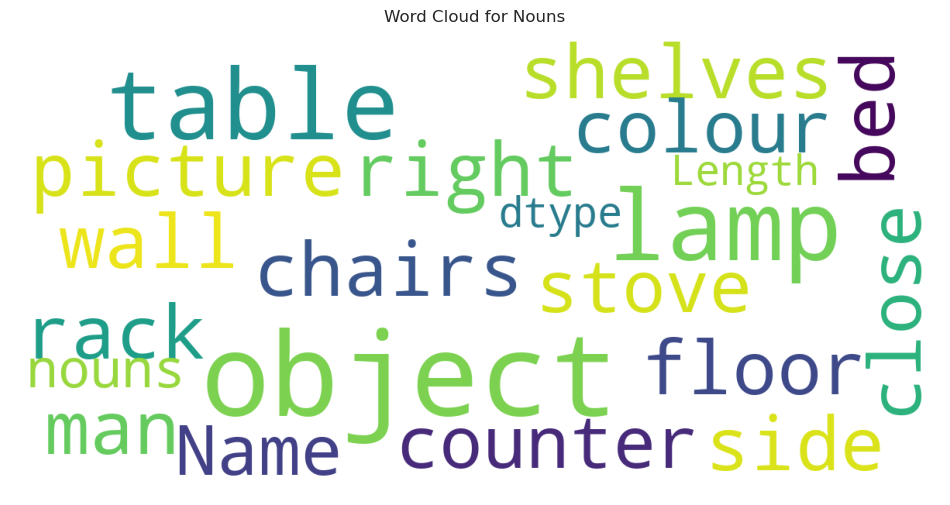

In [24]:
import nltk
from nltk import word_tokenize, pos_tag

def get_pos_tags(text):
    return pos_tag(word_tokenize(text))
def get_nouns(text):
    return [word for word, pos in get_pos_tags(text) if pos.startswith('NN')]
def get_verbs(text):
    return [word for word, pos in get_pos_tags(text) if pos.startswith('VB')]
def get_adjectives(text):
    return [word for word, pos in get_pos_tags(text) if pos.startswith('JJ')]
def get_adverbs(text):
    return [word for word, pos in get_pos_tags(text) if pos.startswith('RB')]

df["nouns"] = df["question"].apply(get_nouns)
df["verbs"] = df["question"].apply(get_verbs)
df["adjectives"] = df["question"].apply(get_adjectives)
df["adverbs"] = df["question"].apply(get_adverbs)

word_cloud(df, "nouns", "Word Cloud for Nouns")

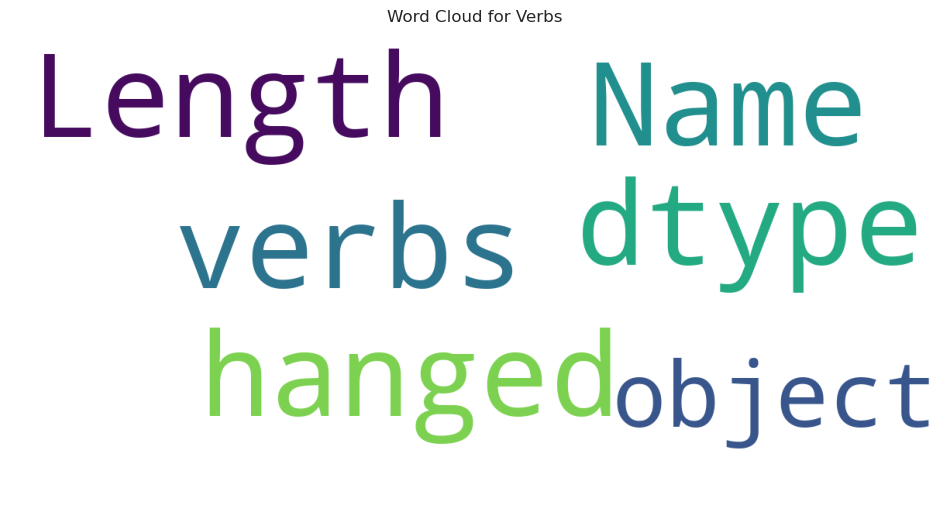

In [25]:
word_cloud(df, "verbs", "Word Cloud for Verbs")

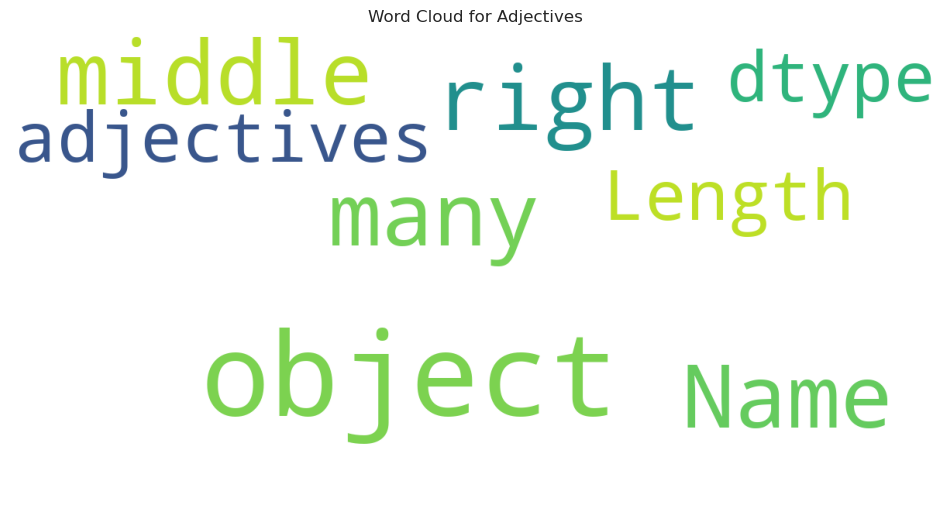

In [26]:
word_cloud(df, "adjectives", "Word Cloud for Adjectives")

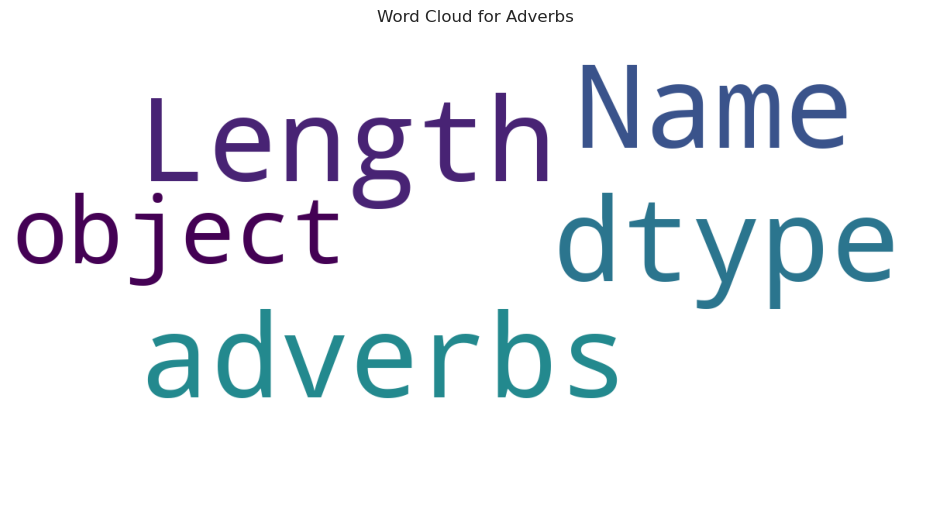

In [27]:
word_cloud(df, "adverbs", "Word Cloud for Adverbs")